# Cohort Analysis

In [1]:
#IMPORT MODULES
import pandas as pd
import numpy as np
import datetime as dt

# visulisation 
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# load data
data = pd.read_excel('Retail_init_cleaned.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  int64         
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  int64         
 7   Country      397924 non-null  object        
 8   Amount       397924 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 27.3+ MB


In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [4]:
data.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID,Amount
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,560617.126645,13.021823,3.116174,15294.315171,22.394749
std,13106.167695,180.420210,22.096788,1713.169877,309.055588
min,536365.000000,1.000000,0.000000,12346.000000,0.000000
25%,549234.000000,2.000000,1.250000,13969.000000,4.680000
50%,561893.000000,6.000000,1.950000,15159.000000,11.800000
75%,572090.000000,12.000000,3.750000,16795.000000,19.800000
max,581587.000000,80995.000000,8142.750000,18287.000000,168469.600000


## Further data screening and cleaning

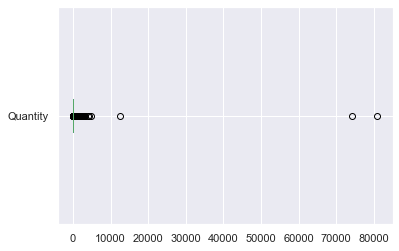

In [5]:
# Using boxplot to detect if there is any Quantity outlier
data.Quantity.plot.box(vert=False);

It is not easy to tell what the outliers are as the boxplot isn't shown completely.                                                        
However, some points above 10000 definitely cause problems, let's plot another one.

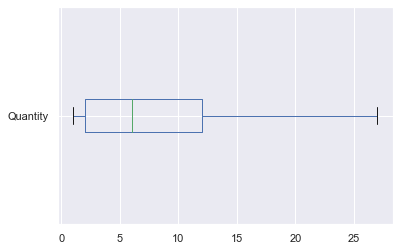

In [6]:
#display without outliers
data.Quantity.plot.box(vert=False, showfliers=False);

The figure suggests rougly most of the **Quantity** falls into the range (0, 28)

In [7]:
data[data.Quantity >= 28].count()

InvoiceNo      25656
StockCode      25656
Description    25656
Quantity       25656
InvoiceDate    25656
UnitPrice      25656
CustomerID     25656
Country        25656
Amount         25656
dtype: int64

In [8]:
# a closer look at the Quantity above 10000
Q10000 = data[data.Quantity > 10000]
Q10000

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
37126,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,77183.6
370473,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256,United Kingdom,0.0
397451,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,168469.6


In [9]:
Customer16446 = data[data.CustomerID == 16446]
Customer16446  

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
133752,553573,22980,PANTRY SCRUBBING BRUSH,1,2011-05-18 09:52:00,1.65,16446,United Kingdom,1.65
133753,553573,22982,PANTRY PASTRY BRUSH,1,2011-05-18 09:52:00,1.25,16446,United Kingdom,1.25
397451,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,168469.60


Customer 16446 only made 3 orders, with the last one being exceptionally large. The order was actually cancelled if you search in the original dataset

In [10]:
Customer12346 = data[data.CustomerID == 12346]
Customer12346   

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
37126,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,77183.6


Customer 12346 only made 1 purchase,and cancelled later as well.

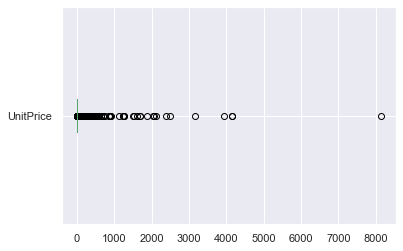

In [11]:
# Using boxplot to detect if there is any UnitPrice outlier
data.UnitPrice.plot.box(vert=False);

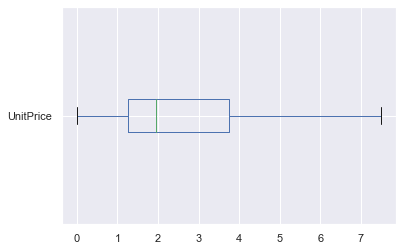

In [12]:
# without outliers
data.UnitPrice.plot.box(vert=False, showfliers=False);

Most unit price fall between (0, 7.5)

In [13]:
data.groupby('Description')['UnitPrice'].mean().nlargest()

Description
DOTCOM POSTAGE                        744.147500
PICNIC BASKET WICKER 60 PIECES        649.500000
Manual                                171.664862
RUSTIC  SEVENTEEN DRAWER SIDEBOARD    158.076923
REGENCY MIRROR WITH SHUTTERS          156.428571
Name: UnitPrice, dtype: float64

It seems these prices are genuine, some of which are service related.

In [14]:
data[data.Quantity >= 8].count()

InvoiceNo      160339
StockCode      160339
Description    160339
Quantity       160339
InvoiceDate    160339
UnitPrice      160339
CustomerID     160339
Country        160339
Amount         160339
dtype: int64

In [15]:
# check the unit prices that are greater than £1,000
data[data.UnitPrice >= 1000].sort_values('UnitPrice', ascending=False) 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
118352,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom,8142.75
308846,573080,M,Manual,1,2011-10-27 14:20:00,4161.06,12536,France,4161.06
308822,573077,M,Manual,1,2011-10-27 14:13:00,4161.06,12536,France,4161.06
295254,571751,M,Manual,1,2011-10-19 11:18:00,3949.32,12744,Singapore,3949.32
269591,569382,M,Manual,1,2011-10-03 16:44:00,3155.95,15502,United Kingdom,3155.95
208732,562946,M,Manual,1,2011-08-11 09:38:00,2500.00,15581,United Kingdom,2500.00
97061,548813,M,Manual,1,2011-04-04 13:03:00,2382.92,12744,Singapore,2382.92
295255,571751,M,Manual,1,2011-10-19 11:18:00,2118.74,12744,Singapore,2118.74
97064,548820,M,Manual,1,2011-04-04 13:04:00,2053.07,12744,Singapore,2053.07
244129,566927,M,Manual,1,2011-09-15 15:20:00,2033.10,17846,United Kingdom,2033.10


We can see that 'DOTCOM POSTAGE', 'Manual', and 'POSTAGE' are amongst the highest unit prices. 

In [16]:
#let's check how many postage are there in the dataset.
data[data.Description.str.contains('postage', case=False, regex=False)] 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.0,12583,France,54.0
377,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.0,12791,Netherlands,15.0
1112,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.0,12662,Germany,18.0
3798,536840,POST,POSTAGE,1,2010-12-02 18:27:00,18.0,12738,Germany,18.0
3978,536852,POST,POSTAGE,1,2010-12-03 09:51:00,18.0,12686,France,18.0
...,...,...,...,...,...,...,...,...,...
397494,581493,POST,POSTAGE,1,2011-12-09 10:10:00,15.0,12423,Belgium,15.0
397512,581494,POST,POSTAGE,2,2011-12-09 10:13:00,18.0,12518,Germany,36.0
397745,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18.0,12662,Germany,18.0
397782,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.0,12526,Germany,36.0


**Manual** and **postage** seem to be the services provided by the retailer, which are not direct indicator of sales and might skew the data distribution. However, it is at your discretion to remove them all or only the top outliers we identified above.

In [17]:
# removing service categories
drop_cats = ['POSTAGE', 'Manual', 'DOTCOM POSTAGE']
data = data[~(data.Description.isin(drop_cats))]
data.shape

(396519, 9)

In [18]:
# removing significant Quantity outliers
data = data[~(data.Quantity >= 28)]
data.shape

(370890, 9)

## Cohort Analysis

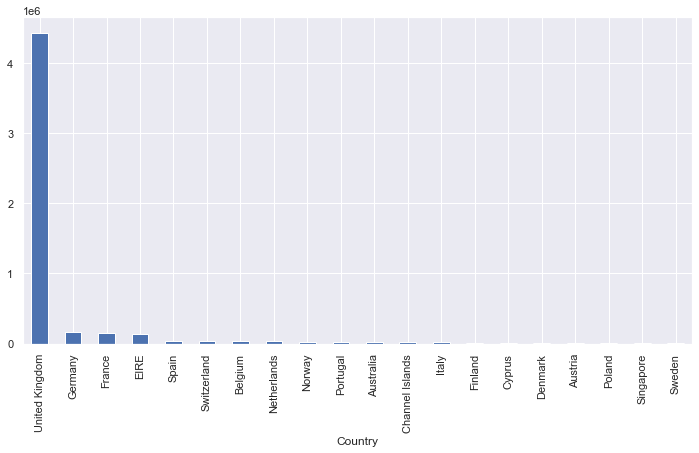

In [19]:
data.groupby('Country')['Amount'].sum().nlargest(20).plot(kind='bar', figsize=(12,6));

We will use the UK data only as it dominates the sales and customers from different countries may vary significantly.

In [20]:
df_uk = data[data.Country == 'United Kingdom']
# save it to Excel file for later use
df_uk.to_excel('UK_Data.xlsx') #if we don't set index=Flase, it will create a new index
df_uk.shape

(333828, 9)

In [21]:
df_date = df_uk.set_index('InvoiceDate')
df_date.head().append(df_date.tail())

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Amount
InvoiceDate,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,15.30
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom,20.34
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom,22.00
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom,20.34
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom,20.34
2011-12-09 12:31:00,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,1.95,15804,United Kingdom,23.40
2011-12-09 12:49:00,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2.95,13113,United Kingdom,23.60
2011-12-09 12:49:00,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,1.25,13113,United Kingdom,30.00
2011-12-09 12:49:00,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,8.95,13113,United Kingdom,214.80


In [22]:
# resample monthly order sum
df_date.Quantity.resample('M').sum()

InvoiceDate
2010-12-31    136531
2011-01-31    114839
2011-02-28    115701
2011-03-31    150471
2011-04-30    137127
2011-05-31    166845
2011-06-30    151168
2011-07-31    158254
2011-08-31    161129
2011-09-30    251192
2011-10-31    262976
2011-11-30    335931
2011-12-31     96064
Freq: M, Name: Quantity, dtype: int64

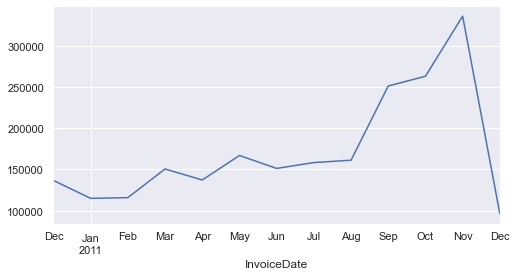

In [23]:
# Plotting monthly total orders
df_date.Quantity.resample('M').sum().plot(figsize=(8,4));

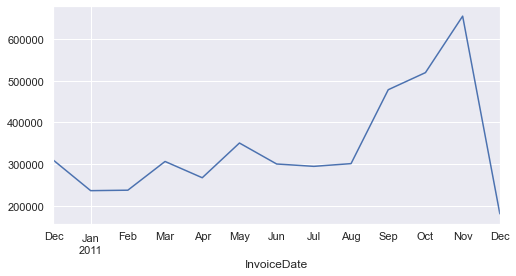

In [24]:
# Plotting monthly total revenues 
df_date.Amount.resample('M').sum().plot(figsize=(8,4)); 

In [25]:
# Let's check total unique customers per month.
df_date.CustomerID.resample('M').nunique()

InvoiceDate
2010-12-31     777
2011-01-31     617
2011-02-28     638
2011-03-31     842
2011-04-30     749
2011-05-31     925
2011-06-30     854
2011-07-31     824
2011-08-31     793
2011-09-30    1096
2011-10-31    1199
2011-11-30    1462
2011-12-31     539
Freq: M, Name: CustomerID, dtype: int64

Since we have only data up to 20011-12-09, i.e. not the whole Dec, let's remove the Decemeber data in 2011 for our cohort analysis

In [26]:
df_uk = df_uk[(df_uk.InvoiceDate.dt.date < dt.date(2011, 12, 1))]

Now, let's explore each customer's first spending by month and allocate them to that cohort.

In [27]:
cohort = df_uk.groupby('CustomerID')['InvoiceDate']\
                            .min().dt.to_period('m')
cohort = cohort.to_frame()

# Rename a column
cohort.columns = ['Cohort']                               
cohort.head()

,Cohort
CustomerID,
12747,2010-12
12748,2010-12
12749,2011-05
12820,2011-01
12821,2011-05


In [28]:
df_uk_cohort = df_uk.set_index('CustomerID').join(cohort)

After joining the new column, we can check what cohort a customer belongs to. Also, we want to find out what other months the customer made purchases.

In [29]:
# create a new column by converting InvoiceDate to Month period
df_uk_cohort['SalesPeriod'] = df_uk_cohort['InvoiceDate']\
                                        .dt.to_period('m')   

In [30]:
# Let's check customer 12747
df_uk_cohort.loc[12747]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Amount,Cohort,SalesPeriod
CustomerID,,,,,,,,,,
12747,537215,85124C,GREEN JUICY FRUIT PHOTO FRAME,12,2010-12-05 15:38:00,2.55,United Kingdom,30.60,2010-12,2010-12
12747,537215,85124B,BLUE JUICY FRUIT PHOTO FRAME,6,2010-12-05 15:38:00,2.55,United Kingdom,15.30,2010-12,2010-12
12747,537215,84879,ASSORTED COLOUR BIRD ORNAMENT,16,2010-12-05 15:38:00,1.69,United Kingdom,27.04,2010-12,2010-12
12747,537215,85062,PEARL CRYSTAL PUMPKIN T-LIGHT HLDR,24,2010-12-05 15:38:00,1.65,United Kingdom,39.60,2010-12,2010-12
12747,537215,85064,CREAM SWEETHEART LETTER RACK,6,2010-12-05 15:38:00,5.45,United Kingdom,32.70,2010-12,2010-12
...,...,...,...,...,...,...,...,...,...,...
12747,577104,85062,PEARL CRYSTAL PUMPKIN T-LIGHT HLDR,12,2011-11-17 17:13:00,1.65,United Kingdom,19.80,2010-12,2011-11
12747,577104,21745,GAOLERS KEYS DECORATIVE GARDEN,4,2011-11-17 17:13:00,3.75,United Kingdom,15.00,2010-12,2011-11
12747,577104,23522,WALL ART DOG AND BALL,6,2011-11-17 17:13:00,2.89,United Kingdom,17.34,2010-12,2011-11


In [31]:
df_uk_cohort.reset_index(inplace=True)
# check each cohort's retention over months
df_uk_cohort.groupby(['Cohort', 'SalesPeriod'])\
                           .CustomerID.nunique()

Cohort   SalesPeriod
2010-12  2010-12        777
         2011-01        274
         2011-02        244
         2011-03        280
         2011-04        274
                       ... 
2011-09  2011-10         61
         2011-11         84
2011-10  2011-10        322
         2011-11         78
2011-11  2011-11        295
Name: CustomerID, Length: 78, dtype: int64

In [32]:
# create a copy of the rentention data and reset index
retention = df_uk_cohort.groupby(['Cohort', 'SalesPeriod']).\
                        CustomerID.nunique().reset_index() 
# create a pivot table
retention = retention.pivot(index='SalesPeriod',columns='Cohort', 
                            values='CustomerID')
retention

Cohort,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11
SalesPeriod,,,,,,,,,,,,
2010-12,777.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01,274.0,343.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-02,244.0,68.0,326.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-03,280.0,89.0,58.0,415.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-04,274.0,79.0,63.0,63.0,270.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-05,306.0,112.0,92.0,108.0,56.0,251.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-06,275.0,94.0,93.0,82.0,54.0,48.0,208.0,NaN,NaN,NaN,NaN,NaN
2011-07,255.0,85.0,83.0,95.0,56.0,43.0,36.0,171.0,NaN,NaN,NaN,NaN
2011-08,269.0,86.0,79.0,68.0,53.0,42.0,29.0,28.0,139.0,NaN,NaN,NaN


In [33]:
# define a function to calculate the retention rate
def reten_rate (df):
    for x in range(len(df)):
        df.iloc[:,x] = df.iloc[:,x].divide(df.iloc[x,x])  
    return df

In [34]:
reten_rate(retention)

Cohort,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11
SalesPeriod,,,,,,,,,,,,
2010-12,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01,0.352638,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-02,0.314028,0.198251,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-03,0.360360,0.259475,0.177914,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-04,0.352638,0.230321,0.193252,0.151807,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-05,0.393822,0.326531,0.282209,0.260241,0.207407,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
2011-06,0.353925,0.274052,0.285276,0.197590,0.200000,0.191235,1.000000,NaN,NaN,NaN,NaN,NaN
2011-07,0.328185,0.247813,0.254601,0.228916,0.207407,0.171315,0.173077,1.000000,NaN,NaN,NaN,NaN
2011-08,0.346203,0.250729,0.242331,0.163855,0.196296,0.167331,0.139423,0.163743,1.000000,NaN,NaN,NaN


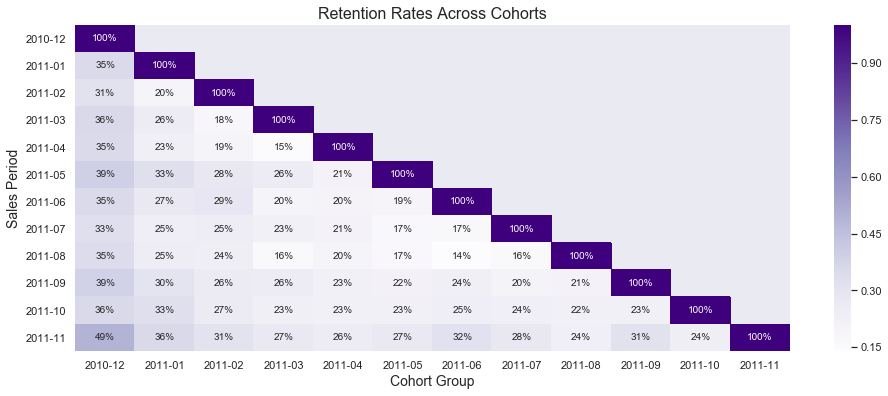

In [35]:
# visualize the result using heatmap
fig, ax = plt.subplots(figsize=(16,6))
ax = sns.heatmap(retention, annot=True, cmap='Purples', fmt='.0%')
ax.set_ylabel('Sales Period', fontsize = 14)
ax.set_xlabel('Cohort Group', fontsize = 14)
ax.set_title('Retention Rates Across Cohorts', fontsize = 16);

We can try to select other metrics and perform the cohort analysis

In [36]:
def aggfunc (df):
    df['TotalCustomers'] = df.CustomerID.nunique()
    df['TotalSKUs'] = df.Description.nunique()
    df['TotalRevenue'] = df.Amount.sum()
    return df
                                                                        #You can also try .agg() method

In [37]:
df_uk_cohort = df_uk_cohort.groupby(['Cohort', 'SalesPeriod']).apply(aggfunc)

In [38]:
df_uk_final = df_uk_cohort.groupby(['Cohort', 'SalesPeriod'])['TotalCustomers','TotalSKUs', 'TotalRevenue'].mean()
df_uk_final

TotalCustomers  TotalSKUs  TotalRevenue
Cohort  SalesPeriod                                         
2010-12 2010-12                 777       2346    309179.270
        2011-01                 274       1662    123909.320
        2011-02                 244       1589    101951.810
        2011-03                 280       1745    120897.450
        2011-04                 274       1682    107084.780
        2011-05                 306       1727    133395.950
        2011-06                 275       1750    116659.280
        2011-07                 255       1837    117366.090
        2011-08                 269       1810    121912.030
        2011-09                 301       1960    158293.420
        2011-10                 279       1933    144155.390
        2011-11                 383       2199    224191.290
2011-01 2011-01                 343       1693    112007.130
        2011-02                  68        873     22295.500
        2011-03                  89       1004     28893.050
        2011-04                  79        894     24551.650
        2011-05                 112       1041     43250.510
        2011-06                  94       1011     37396.740
        2011-07                  85        942     36128.910
        2011-08                  86        970     30631.630
        2011-09                 104       1206     41801.021
        2011-10                 112       1337     55599.000
        2011-11                 123       1564     66132.740
2011-02 2011-02                 326       1669    112775.270
        2011-03                  58        695     15953.090
        2011-04                  63        890     21775.950
        2011-05                  92        930     34324.900
        2011-06                  93        910     31628.780
        2011-07                  83        858     24462.360
        2011-08                  79        851     29075.470
...                             ...        ...           ...
2011-04 2011-10                  61        904     23610.990
        2011-11                  70        911     25507.110
2011-05 2011-05                 251       1448     76867.820
        2011-06                  48        610     12269.350
        2011-07                  43        482     10817.130
        2011-08                  42        548     13135.230
        2011-09                  54        760     22868.530
        2011-10                  57        885     22250.000
        2011-11                  68        798     23750.140
2011-06 2011-06                 208       1563     55533.010
        2011-07                  36        528      7002.430
        2011-08                  29        377      7036.100
        2011-09                  49        722     15578.240
        2011-10                  51        861     17793.680
        2011-11                  66        983     23000.290
2011-07 2011-07                 171       1510     49536.841
        2011-08                  28        309      7023.550
        2011-09                  35        737     11662.640
        2011-10                  41        730     14720.940
        2011-11                  48        841     15140.200
2011-08 2011-08                 139       1500     47382.500
        2011-09                  29        931     15522.760
        2011-10                  31       1133     27370.780
        2011-11                  33       1124     31606.760
2011-09 2011-09                 270       1699    104910.731
        2011-10                  61       1121     22973.100
        2011-11                  84       1084     29663.420
2011-10 2011-10                 322       2039    113686.750
        2011-11                  78       1258     31249.990
2011-11 2011-11                 295       2067     96427.980

[78 rows x 3 columns]

In [39]:
# Let's see how the revenues changes for each cohort over time
revenue = df_uk_final.TotalRevenue.reset_index() 
revenue = revenue.pivot(index='SalesPeriod', columns='Cohort', values='TotalRevenue')
revenue.round(2)

Cohort,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11
SalesPeriod,,,,,,,,,,,,
2010-12,309179.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01,123909.32,112007.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-02,101951.81,22295.50,112775.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-03,120897.45,28893.05,15953.09,140414.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-04,107084.78,24551.65,21775.95,21443.70,92145.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-05,133395.95,43250.51,34324.90,41697.98,21007.19,76867.82,NaN,NaN,NaN,NaN,NaN,NaN
2011-06,116659.28,37396.74,31628.78,29808.24,16780.01,12269.35,55533.01,NaN,NaN,NaN,NaN,NaN
2011-07,117366.09,36128.91,24462.36,31332.57,17732.84,10817.13,7002.43,49536.84,NaN,NaN,NaN,NaN
2011-08,121912.03,30631.63,29075.47,27794.85,16992.97,13135.23,7036.10,7023.55,47382.50,NaN,NaN,NaN


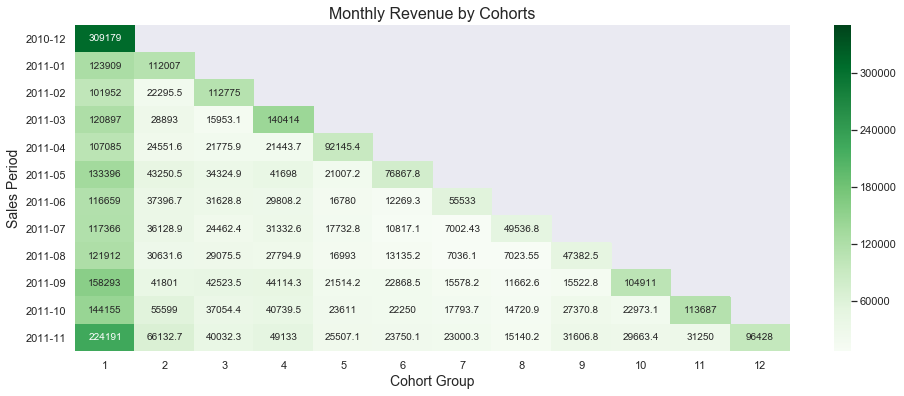

In [40]:
# create cohort number
cohort_group_no = [1,2,3,4,5,6,7,8,9,10,11,12]

fig, ax = plt.subplots(figsize=(16,6))
ax = sns.heatmap(revenue, annot=True,cmap='Greens',fmt='g', 
                 vmax=350000, xticklabels=cohort_group_no)
ax.set_ylabel('Sales Period', fontsize = 14)
ax.set_xlabel('Cohort Group', fontsize = 14)
ax.set_title('Monthly Revenue by Cohorts', fontsize = 16);

### Excercise:
Try to plot the total SKUs by cohort group heatmap yourself.